In [3]:
import pyarrow.parquet as pq
import numpy as np
import pickle
from pathlib import Path
from pyarrow.parquet import ParquetFile
import pyarrow as pa 
import matplotlib.pyplot as plt


folder = "/Users/jakobrimmer/Documents/TRIUMF/WCTE/analysis/time_cal/wcte_test/mPMT_led_events/18_11_2024"


run = '20241118160504'

pf_wf = ParquetFile(folder+'/soft_single_'+run+'_waveforms.parquet') 
#pf_led = ParquetFile(folder+'/soft_single_'+run+'_led.parquet') 

#tot_rows_wf = pf_wf.metadata.num_rows

tot_rows_wf = 10000 # How many rows to unpack


wf_batch = next(pf_wf.iter_batches(batch_size = tot_rows_wf)) # Unpack n rows in the parquet format
          

df_wf = pa.Table.from_batches([wf_batch]).to_pandas() # Convert to a pandas dataframe


card_id = df_wf.loc[:,'card_id']
chan = df_wf.loc[:,'chan']
samples = df_wf.loc[:,'samples']
coarse = df_wf.loc[:,'coarse']


Card ID:  83
Channel:  1


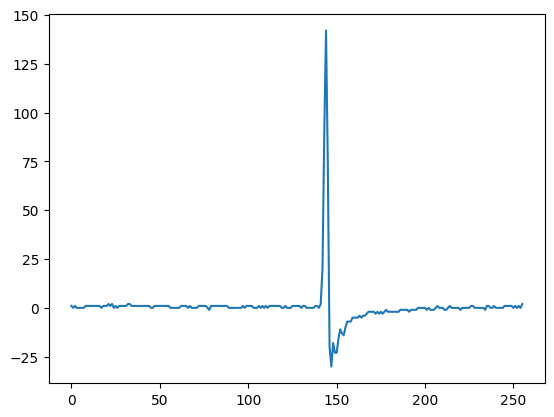

In [4]:
print('Card ID: ', card_id[1])
print('Channel: ', chan[1])
plt.plot(samples[1])
